In [1]:
# Pour aider à comprendre SIFT

# https://www.kaggle.com/code/pierre54/bag-of-words-model-with-sift-descriptors/notebook

In [2]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

# Label encoder

from sklearn import preprocessing

# Affichage des images

from matplotlib.image import imread

# Traitement des images

import os
from os import listdir

In [3]:
# Recupération des données

data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [4]:
# On récupère les première catégories dans la colonne product category tree

data['product_category_tree_preprocess'] = data['product_category_tree'].apply(lambda x : x[2:-2].split(' >> '))

# On teste les labels avec la categorie du produit

data['label_name'] = data['product_category_tree_preprocess'].apply(lambda x : x[0])



In [5]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_category_tree_preprocess,label_name
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Home Furnishing, Curtains & Accessories, Curt...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[Baby Care, Baby Bath & Skin, Baby Bath Towels...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Baby Care, Baby Bath & Skin, Baby Bath Towels...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Home Furnishing, Bed Linen, Bedsheets, SANTOS...",Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Home Furnishing, Bed Linen, Bedsheets, Jaipur...",Home Furnishing


In [6]:
# On preprocess les labels

le = preprocessing.LabelEncoder()

data["label"] = le.fit_transform(data["label_name"])

In [7]:
# On crée un path vers les images

data['image_path'] = "Flipkart/Images/" + data['image']

In [8]:
data[["image_path","label_name","label"]]

,image_path,label_name,label
0,Flipkart/Images/55b85ea15a1536d46b7190ad6fff8c...,Home Furnishing,4
1,Flipkart/Images/7b72c92c2f6c40268628ec5f14c6d5...,Baby Care,0
2,Flipkart/Images/64d5d4a258243731dc7bbb1eef49ad...,Baby Care,0
3,Flipkart/Images/d4684dcdc759dd9cdf41504698d737...,Home Furnishing,4
4,Flipkart/Images/6325b6870c54cd47be6ebfbffa620e...,Home Furnishing,4
...,...,...,...
1045,Flipkart/Images/958f54f4c46b53c8a0a9b8167d9140...,Baby Care,0
1046,Flipkart/Images/fd6cbcc22efb6b761bd564c2892848...,Baby Care,0
1047,Flipkart/Images/5912e037d12774bb73a2048f35a000...,Baby Care,0
1048,Flipkart/Images/c3edc504d1b4f0ba6224fa53a43a7a...,Baby Care,0


In [9]:
list(data['image_path'])

['Flipkart/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg',
 'Flipkart/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg',
 'Flipkart/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg',
 'Flipkart/Images/d4684dcdc759dd9cdf41504698d737d8.jpg',
 'Flipkart/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg',
 'Flipkart/Images/893aa5ed55f7cff2eccea7758d7a86bd.jpg',
 'Flipkart/Images/f355cc1ccb08bd0d283ed979b7ee7515.jpg',
 'Flipkart/Images/dd0e3470a7e6ed76fd69c2da27721041.jpg',
 'Flipkart/Images/41384da51732c0b4df3de8f395714fbb.jpg',
 'Flipkart/Images/710ed5f2393a4b9e8823aa0029f71f93.jpg',
 'Flipkart/Images/920154acbe49d3202ed7d2ed2df1ea13.jpg',
 'Flipkart/Images/08452abdadb3db1e686b94a9c52fc7b6.jpg',
 'Flipkart/Images/1e8741b5ae27a513546c94b3f3312aee.jpg',
 'Flipkart/Images/189fa66a5fa6f08d2802a62ecf0be298.jpg',
 'Flipkart/Images/bbb8cdc5406ff60ff06ff64630f2ca47.jpg',
 'Flipkart/Images/1120bc768623572513df956172ffefeb.jpg',
 'Flipkart/Images/5479bb7028827d60000720a2c135976a.jpg',
 'Flipkart/Images/733aa1e801a13

In [10]:
# On crée la liste des path vers les photos

list_photos = list(data['image_path'])

len(list_photos)

1050

In [11]:
list_labels = list(data['label_name'].unique())
list_labels

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

Home Furnishing


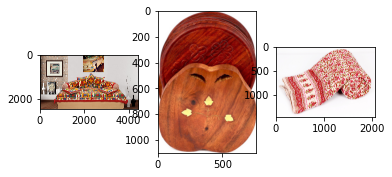

Baby Care


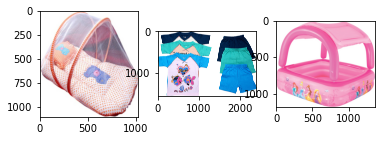

Watches


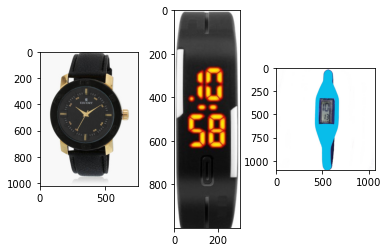

Home Decor & Festive Needs


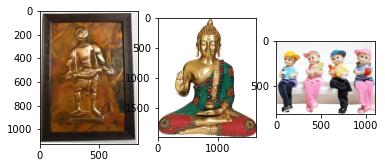

Kitchen & Dining


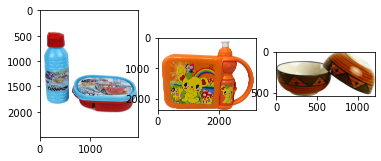

Beauty and Personal Care


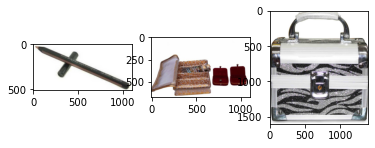

Computers


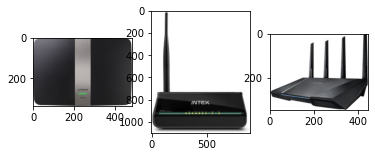

In [12]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["label_name"][i]==name]
    return list_image_name

list_furnishing=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=='Home Furnishing']
list_baby=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=='Baby Care']
list_watches=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=='Watches']
list_decor=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=='Home Decor & Festive Needs']
list_kitchen=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=='Kitchen & Dining']
list_beauty=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=='Beauty and Personal Care']
list_computers=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=='Computers']

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename =  list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## Détermination et affichage des descripteurs SIFT

In [13]:
# SIFT : Scale invariant feature transform
# SIFT est utilisé pour réduire une image en un ensemble de points et leur description
# Je vais utiliser SIFT pour trouver des descripteurs à chaque image
# Descripteur : Vecteur associé à chaque point qui montre la direction la plus importante du changement de lumière

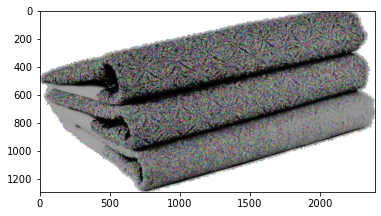

Descripteurs :  (47651, 128)

[[ 85. 113.  31. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [ 40.   0.   0. ...   0.   0.  51.]
 [ 37.   1.   0. ...   0.   0.   0.]]


In [14]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [15]:
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


C:\Users\Louis\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           345.07 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [16]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...


C:\Users\Louis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


temps de traitement kmeans :            34.76 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [17]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.91 secondes


### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [18]:
im_features.shape

(1050, 719)

In [19]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 504)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [20]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
* Les catégories "cloudy" et "rain" sont partiellement séparées

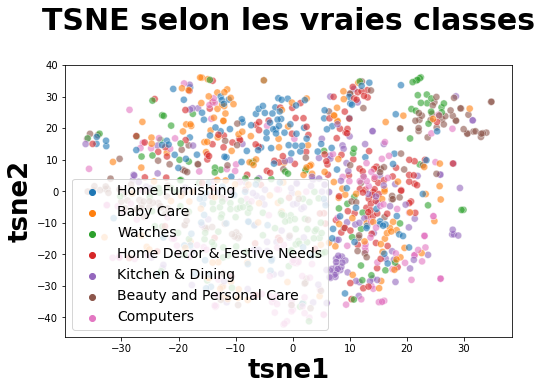

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [22]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.05 est très faible

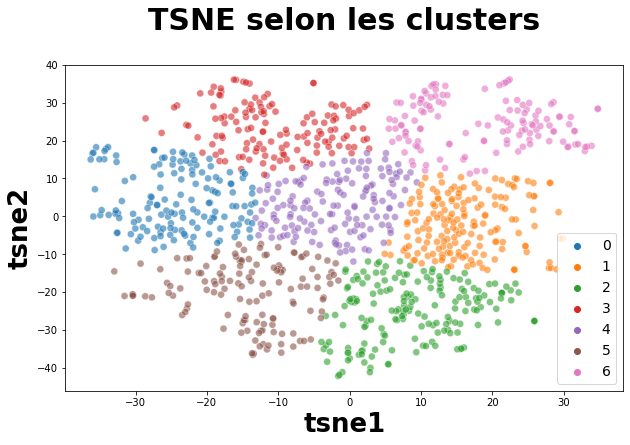

ARI :  0.050390228398975716


In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))